In [1]:
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.manifold import TSNE

%matplotlib inline
plt.style.use("seaborn")
pd.options.display.max_colwidth = 120
warnings.filterwarnings("ignore")

### Topic modeling with NMF:

In [2]:
df = pd.read_pickle("data/clean_summary.pkl")

In [3]:
more_sws = ["that", "this", "a", "the", "from", "not",
            "at", "to", "of", "for", "ha", "what",
            "also", "or", "more", "in", "he", "wa",
            "and", "by", "is", "after", "are", "thing",
            "wasnt", "just", "doe", "u", "did", "book", 
            "dont"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_sws)

In [4]:
tf_idf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
dtm_tfidf = tf_idf.fit_transform(df["clean_summary"])
dtm_tfidf

<3017x14933 sparse matrix of type '<class 'numpy.float64'>'
	with 232957 stored elements in Compressed Sparse Row format>

In [5]:
def topics_nmf(cv, dtm, topic=2):
    """Performs topic modeling with non-negative matrix factorization with a document term matrix.
       Parameters: 
       (1) cv = vectorizer
       (2) dmt = document term matrix
       (3) topic = number of topics
       Returns: Top ten words associate with each topic.
    """
    nmf = NMF(topic, random_state=2)
    doc_topic = nmf.fit_transform(dtm)
    
    words = cv.get_feature_names()
    t = nmf.components_.argsort(axis=1)[:, -1:-11:-1]
    topic_words = [[words[e] for e in l] for l in t]
    
    for i in range(len(topic_words)):
        print(f"Topic {i+1}:", "\n", topic_words[i], "\n")
        
    return nmf, doc_topic, words

In [ ]:
# topics_nmf(tf_idf, dtm_tfidf, topic=2)

In [61]:
# topics_nmf(tf_idf, dtm_tfidf, topic=6)

In [62]:
# topics_nmf(tf_idf, dtm_tfidf, topic=10)

In [6]:
#topics_nmf(tf_idf, dtm_tfidf, topic=12)
nmf, doc_topic, words = topics_nmf(tf_idf, dtm_tfidf, topic=12)

Topic 1: 
 ['story', 'life', 'year', 'day', 'true', 'man', 'journey', 'city', 'tell', 'account'] 

Topic 2: 
 ['business', 'make', 'way', 'people', 'life', 'need', 'success', 'learn', 'want', 'change'] 

Topic 3: 
 ['human', 'science', 'universe', 'theory', 'scientific', 'history', 'world', 'animal', 'scientist', 'evolution'] 

Topic 4: 
 ['woman', 'men', 'girl', 'feminist', 'sex', 'sexual', 'gender', 'female', 'male', 'right'] 

Topic 5: 
 ['god', 'faith', 'jesus', 'christian', 'christianity', 'religion', 'bible', 'christ', 'church', 'spiritual'] 

Topic 6: 
 ['american', 'america', 'black', 'political', 'state', 'history', 'nation', 'white', 'new', 'united'] 

Topic 7: 
 ['health', 'disease', 'cancer', 'food', 'patient', 'treatment', 'body', 'dr', 'diet', 'medical'] 

Topic 8: 
 ['war', 'soldier', 'world', 'german', 'nazi', 'ii', 'history', 'account', 'military', 'army'] 

Topic 9: 
 ['love', 'relationship', 'life', 'self', 'spiritual', 'couple', 'journey', 'finding', 'help', 'marria

In [63]:
# topics_nmf(tf_idf, dtm_tfidf, topic=13)

In [64]:
# topics_nmf(tf_idf, dtm_tfidf, topic=14)
# nmf, doc_topic, words = topics_nmf(tf_idf, dtm_tfidf, topic=14)

### Visualizing topics (12) from topic modeling:

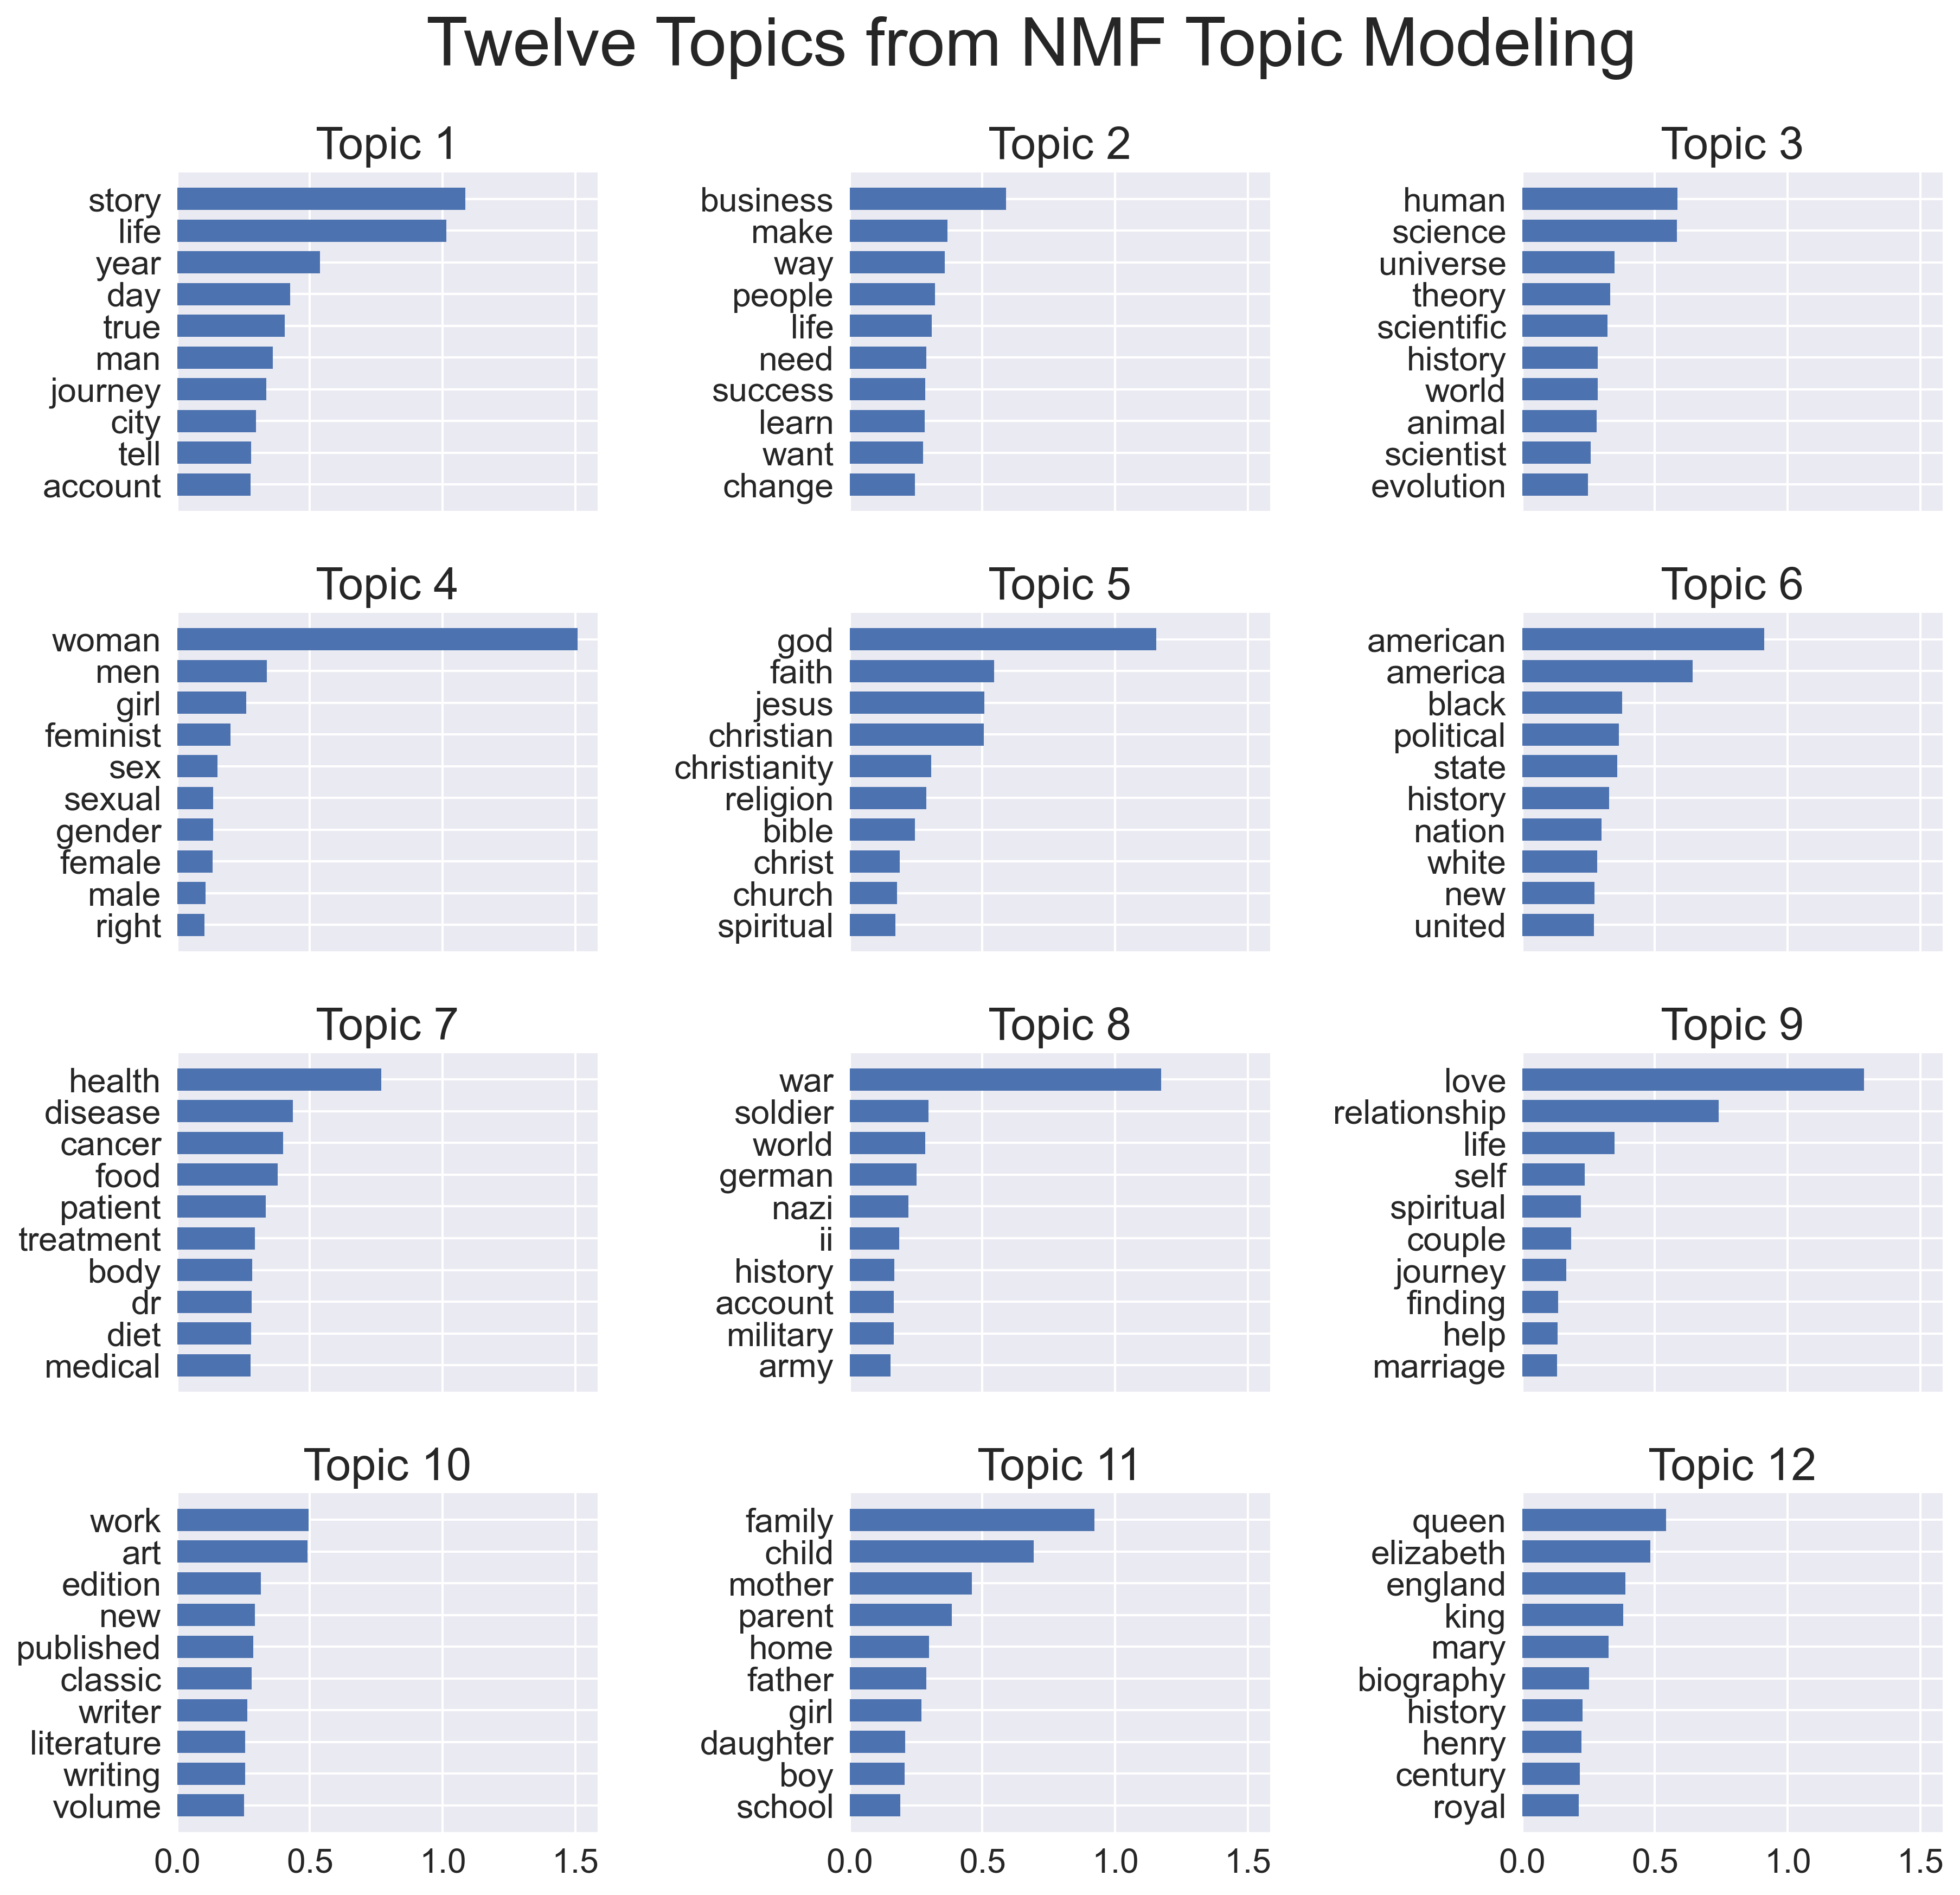

In [71]:
plt.rcParams['figure.dpi'] = 300
fig, axes = plt.subplots(4, 3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [words[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 20})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=15)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle("Twelve Topics from NMF Topic Modeling", fontsize=30)

plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.6, hspace=0.3);
#plt.savefig("topics_NMF_12.svg");

In [7]:
columns = [f"topic_{i}" for i in range(1, 13)]

docs_topics = pd.DataFrame(doc_topic.round(4),
                           index=df.index,
                           columns=columns)
docs_topics["topic"] = doc_topic.argmax(axis=1) + 1
#docs_topics.index

In [8]:
docs_count = docs_topics["topic"].value_counts().sort_index().reset_index()
docs_count

,index,topic
0,1,342
1,2,359
2,3,247
3,4,229
4,5,149
5,6,339
6,7,180
7,8,233
8,9,150
9,10,362


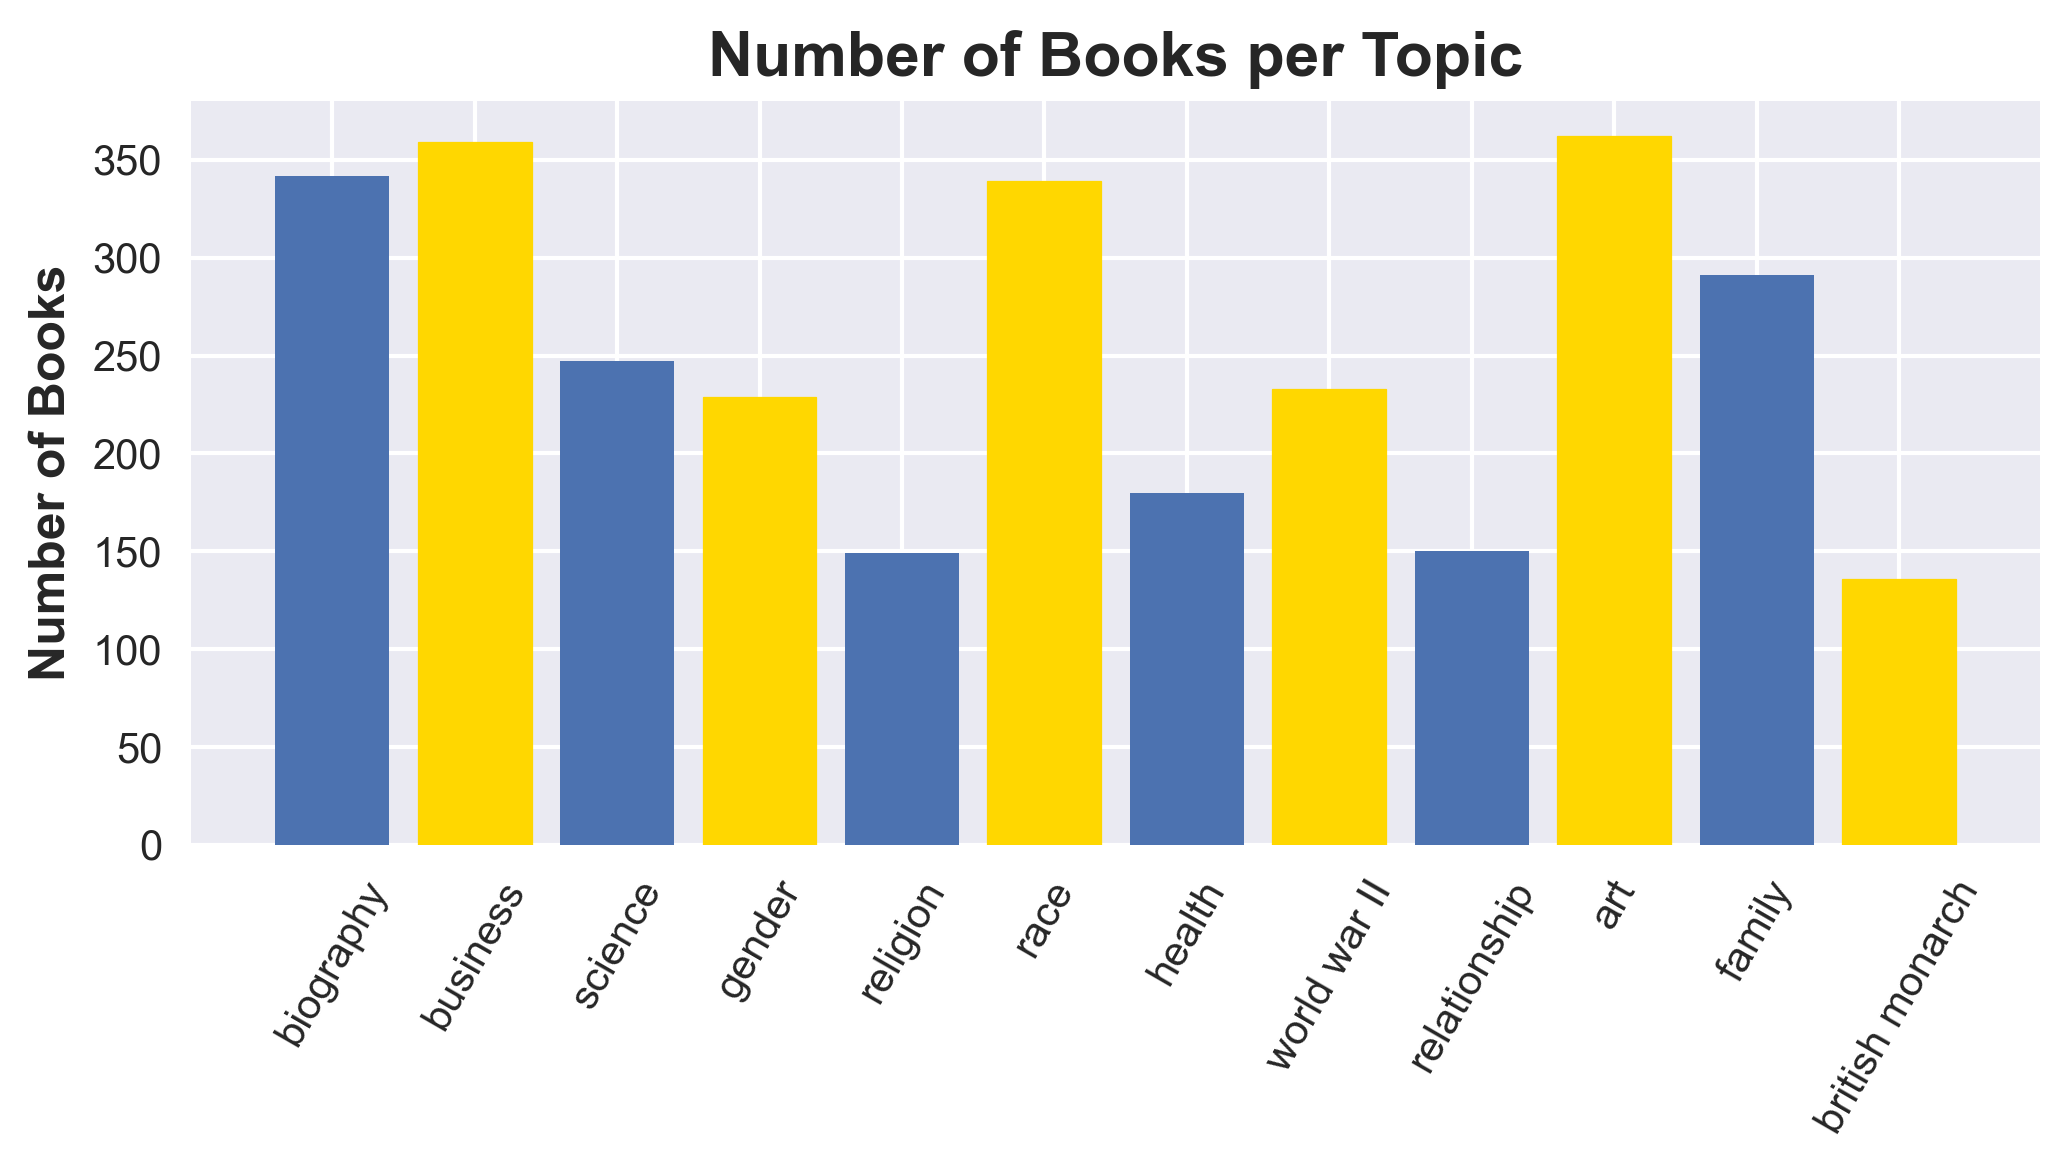

In [9]:
plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams['figure.dpi'] = 300

barlist = plt.bar(range(12), docs_count.topic)

#change color of every other bar
for bar in range(1, 13, 2):
    barlist[bar].set_color("gold")
    
plt.title("Number of Books per Topic", fontsize = 15, weight = "bold")
plt.ylabel("Number of Books", fontsize = 12, weight = "bold")

topics = ["biography", "business", "science", "gender", "religion", "race",
          "health", "world war II", "relationship", "art", "family", "british monarch"]
xtick_lab = topics
plt.xticks(range(12), xtick_lab, rotation = 60)
plt.tight_layout();
#plt.savefig("images/number_reviews_topics.svg");

### Visualize book topics with t-SNE:

In [10]:
doc_topic2 = docs_topics.to_numpy()

In [11]:
topics = doc_topic2[:, 0:12]
topics.shape
target = doc_topic2[:, -1]

In [12]:
model = TSNE(n_components=2, random_state=11, verbose=0)
two_dim = model.fit_transform(topics)

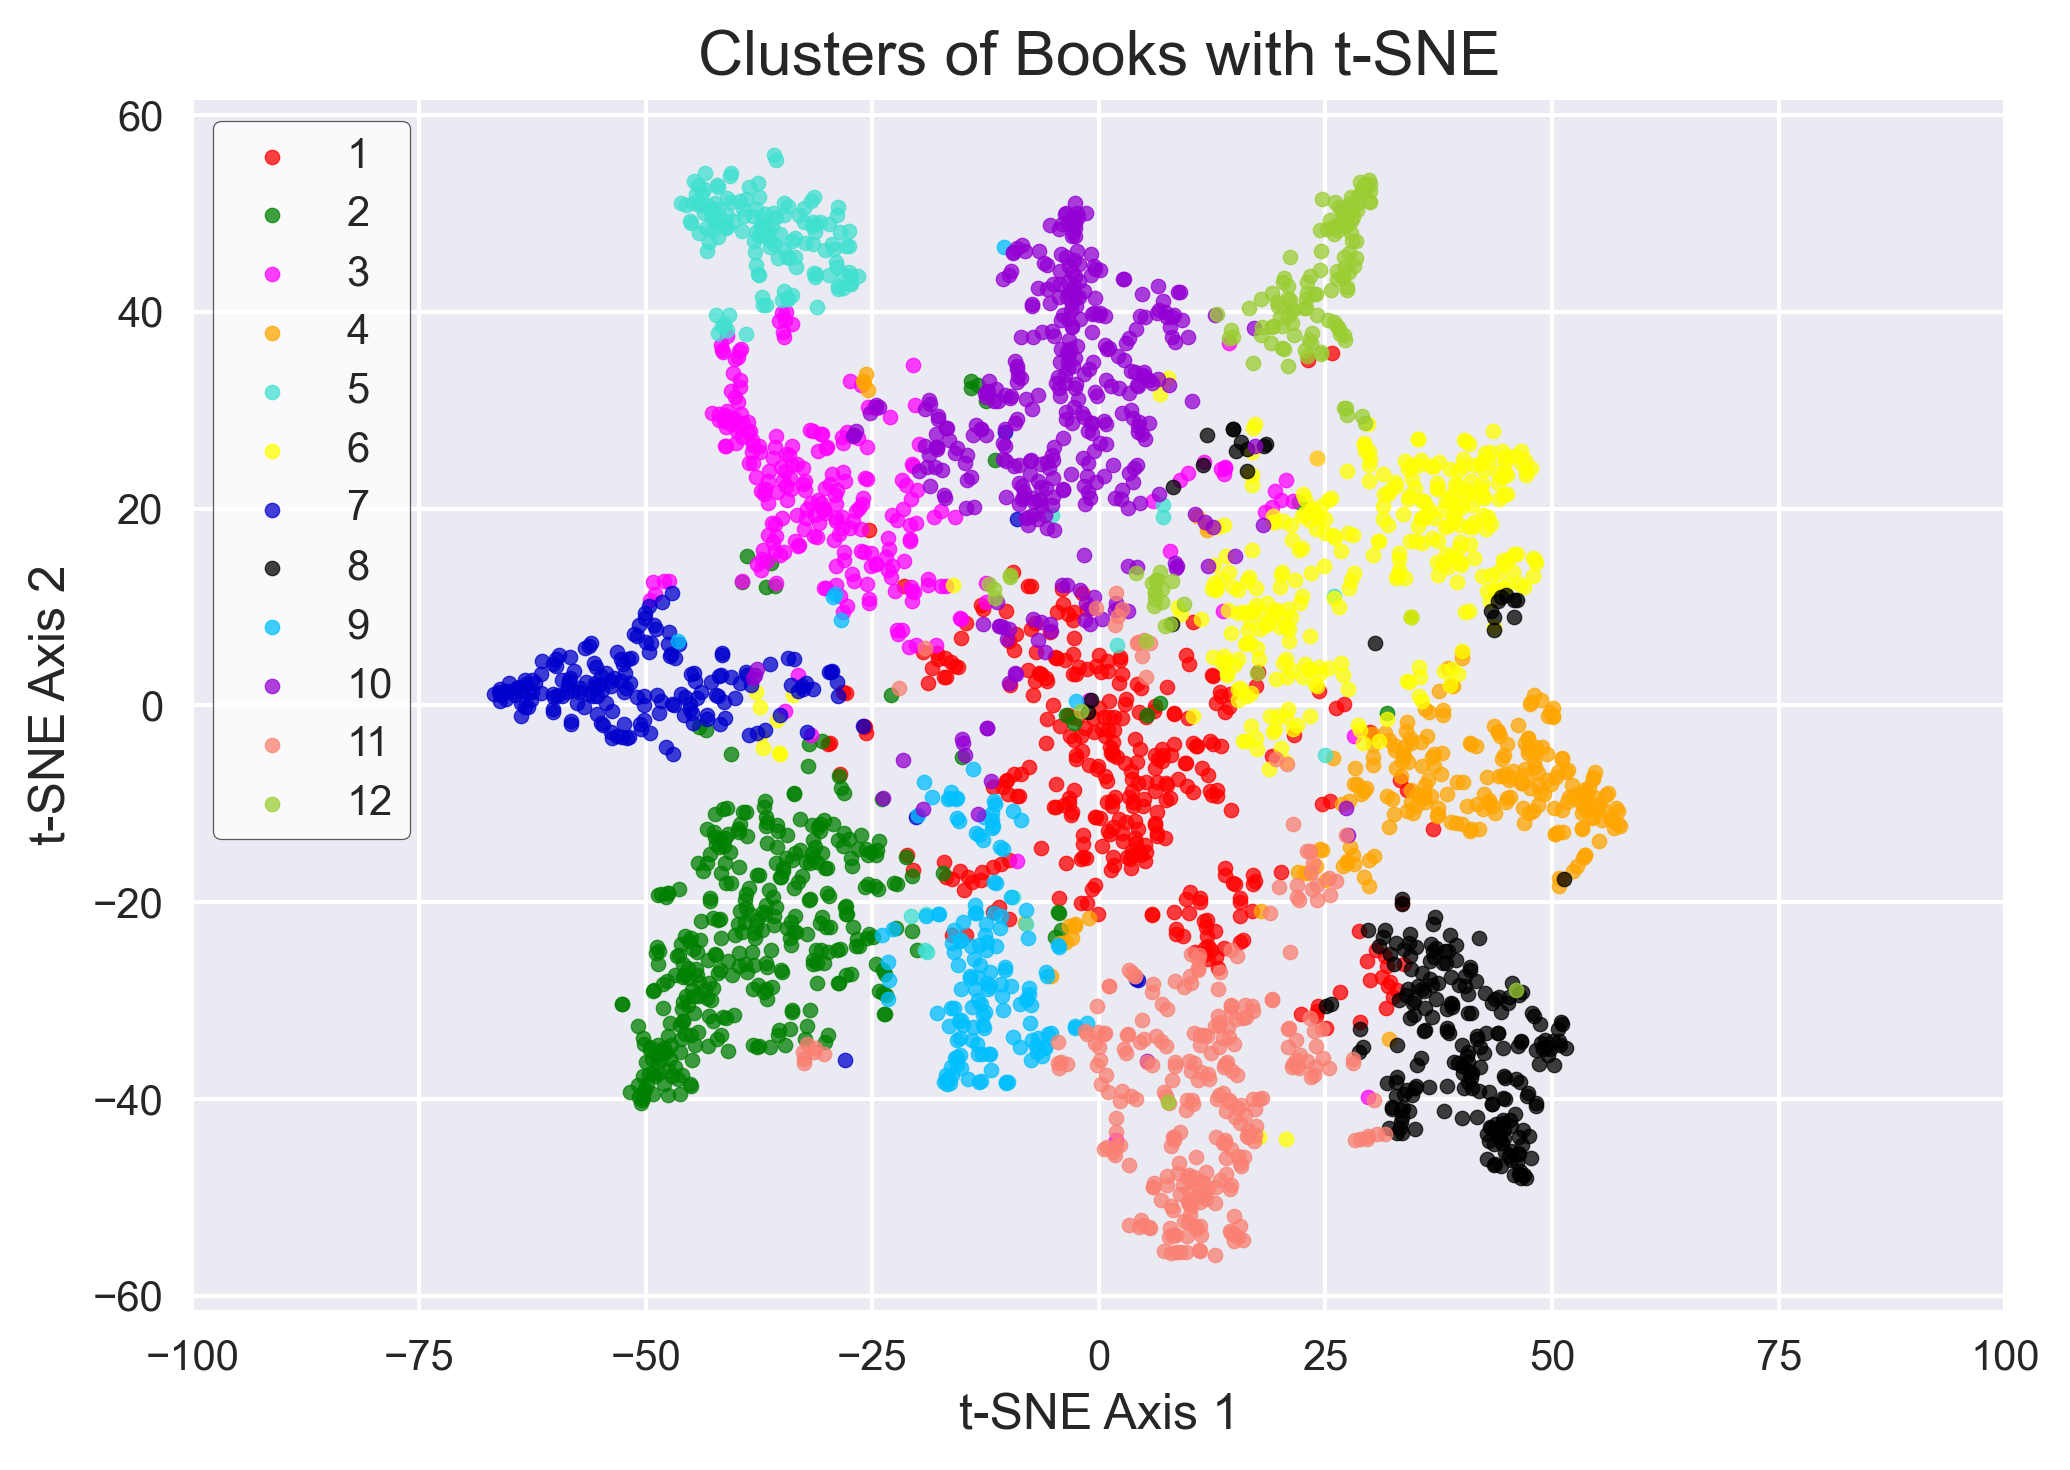

In [13]:
from itertools import cycle
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams['figure.dpi'] = 300

target_names = np.array(range(1, 13))

colors = cycle(["red","green","magenta","orange","turquoise","yellow",
                "mediumblue", "black", "deepskyblue", "darkviolet", "salmon", "yellowgreen"])
target_ids = range(1, 13)

for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(two_dim[target == i, 0], two_dim[target == i, 1], c=c, label=label, s=12, alpha=0.75)
plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
plt.title("Clusters of Books with t-SNE", fontsize=15)
plt.ylabel("t-SNE Axis 2", fontsize=12)
plt.xlabel("t-SNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout();
#plt.savefig("summary_clusters_tSNE.svg");

### Save data for recommendation system:

In [86]:
df.head(3)

,title,author,rating,num_rating,review,page,year,publisher,summary,language,clean_summary
0,The Diary of a Young Girl,Anne Frank,4.16,2887098,30439,283.0,July 1993,by Bantam,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a wo...",en,discovered in the attic in which she spent the last year of her life anne frank remarkable diary ha become a world c...
1,Night,Elie Wiesel,4.34,1008920,30066,115.0,January 16th 2006,by Hill & Wang,"Born in the town of Sighet, Transylvania, Elie Wiesel was a teenager when he and his family were taken from their ho...",en,born in the town of sighet transylvania elie wiesel wa a teenager when he and his family were taken from their home ...
2,Being and Time,Martin Heidegger,4.03,20738,613,589.0,August 1st 1962,by Harper & Row (NYC/Evanston),"One of the most important philosophical works of our time, a work that has had tremendous influence on philosophy, l...",en,one of the most important philosophical work of our time a work that ha had tremendous influence on philosophy liter...


In [87]:
docs_topics.head(3)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic
0,0.0223,0.0000,0.0295,0.0285,0.0,0.0,0.0,0.0702,0.0,0.0038,0.0793,0.0179,11
1,0.0073,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0216,0.0,0.0171,0.0649,0.0035,11
2,0.0000,0.0023,0.0166,0.0000,0.0,0.0,0.0,0.0000,0.0,0.1318,0.0000,0.0000,10


In [88]:
#merge the original dataframe and the document-topic dataframe
df_tops = df.merge(docs_topics, left_index=True, right_index=True)
df_tops.head(3)

,title,author,rating,num_rating,review,page,year,publisher,summary,language,...,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic
0,The Diary of a Young Girl,Anne Frank,4.16,2887098,30439,283.0,July 1993,by Bantam,"Discovered in the attic in which she spent the last years of her life, Anne Frank’s remarkable diary has become a wo...",en,...,0.0285,0.0,0.0,0.0,0.0702,0.0,0.0038,0.0793,0.0179,11
1,Night,Elie Wiesel,4.34,1008920,30066,115.0,January 16th 2006,by Hill & Wang,"Born in the town of Sighet, Transylvania, Elie Wiesel was a teenager when he and his family were taken from their ho...",en,...,0.0000,0.0,0.0,0.0,0.0216,0.0,0.0171,0.0649,0.0035,11
2,Being and Time,Martin Heidegger,4.03,20738,613,589.0,August 1st 1962,by Harper & Row (NYC/Evanston),"One of the most important philosophical works of our time, a work that has had tremendous influence on philosophy, l...",en,...,0.0000,0.0,0.0,0.0,0.0000,0.0,0.1318,0.0000,0.0000,10


In [89]:
df_tops.topic.value_counts().sort_index()

1     342
2     359
3     247
4     229
5     149
6     339
7     180
8     233
9     150
10    362
11    291
12    136
Name: topic, dtype: int64

In [90]:
#df_tops.to_pickle("data/df_with_topic_vecs.pkl")